In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/discovering-hidden-trends-in-global-video-games/Video Games Sales.csv


In [2]:
dados_games = pd.read_csv('/kaggle/input/discovering-hidden-trends-in-global-video-games/Video Games Sales.csv')
dados_games

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [3]:
dados_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [4]:
dados_games.dtypes

index              int64
Rank               int64
Game Title        object
Platform          object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
Review           float64
dtype: object

In [5]:
variaveis = pd.DataFrame(dados_games.dtypes, columns = ['Tipos de variáveis'])
variaveis

,Tipos de variáveis
index,int64
Rank,int64
Game Title,object
Platform,object
Year,float64
Genre,object
Publisher,object
North America,float64
Europe,float64
Japan,float64


In [6]:
variaveis.columns.name = 'Variaveis'
variaveis

Variaveis,Tipos de variáveis
index,int64
Rank,int64
Game Title,object
Platform,object
Year,float64
Genre,object
Publisher,object
North America,float64
Europe,float64
Japan,float64


In [7]:
dados_games.Genre

0             Sports
1           Platform
2             Racing
3             Sports
4             Puzzle
            ...     
1902          Action
1903    Role-Playing
1904            Misc
1905          Sports
1906        Fighting
Name: Genre, Length: 1907, dtype: object

In [8]:
tipo_de_jogos = dados_games['Genre']
type(tipo_de_jogos)

pandas.core.series.Series

In [9]:
tipo_de_jogos.drop_duplicates(inplace = True)
tipo_de_jogos

0            Sports
1          Platform
2            Racing
4            Puzzle
6              Misc
7           Shooter
9        Simulation
10     Role-Playing
14           Action
37         Fighting
67        Adventure
129        Strategy
Name: Genre, dtype: object

In [10]:
tipo_de_jogos = pd.DataFrame(tipo_de_jogos)
tipo_de_jogos

,Genre
0,Sports
1,Platform
2,Racing
4,Puzzle
6,Misc
7,Shooter
9,Simulation
10,Role-Playing
14,Action
37,Fighting


In [11]:
tipo_de_jogos.index = range(tipo_de_jogos.shape[0])
tipo_de_jogos

,Genre
0,Sports
1,Platform
2,Racing
3,Puzzle
4,Misc
5,Shooter
6,Simulation
7,Role-Playing
8,Action
9,Fighting


In [12]:
tipo_de_jogos.columns.name = 'Id'
tipo_de_jogos

Id,Genre
0,Sports
1,Platform
2,Racing
3,Puzzle
4,Misc
5,Shooter
6,Simulation
7,Role-Playing
8,Action
9,Fighting


In [13]:
que_mais_jogo = ['Puzzle', 'Action', 'Fighting', 'Adventure', 'Strategy']
que_mais_jogo

['Puzzle', 'Action', 'Fighting', 'Adventure', 'Strategy']

In [14]:
minha_preferencia = dados_games['Genre'].isin(que_mais_jogo)
minha_preferencia

0       False
1       False
2       False
3       False
4        True
        ...  
1902     True
1903    False
1904    False
1905    False
1906     True
Name: Genre, Length: 1907, dtype: bool

In [15]:
dados_games[minha_preferencia]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
14,14,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08
21,21,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43
29,29,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00
37,37,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,1891,1892,Ben 10: Protector of Earth,PS2,2007.0,Action,D3Publisher,0.09,0.61,0.00,0.13,0.84,57.20
1895,1895,1896,Q*bert,PS,1999.0,Puzzle,Atari,0.46,0.32,0.00,0.05,0.84,58.00
1898,1898,1899,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83,71.88
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00


In [16]:
games_que_posso_gostar = dados_games[minha_preferencia]
games_que_posso_gostar

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
14,14,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08
21,21,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43
29,29,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00
37,37,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,1891,1892,Ben 10: Protector of Earth,PS2,2007.0,Action,D3Publisher,0.09,0.61,0.00,0.13,0.84,57.20
1895,1895,1896,Q*bert,PS,1999.0,Puzzle,Atari,0.46,0.32,0.00,0.05,0.84,58.00
1898,1898,1899,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83,71.88
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00


In [17]:
games_que_posso_gostar.index = range(games_que_posso_gostar.shape[0])
games_que_posso_gostar

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
1,14,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08
2,21,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43
3,29,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00
4,37,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,1891,1892,Ben 10: Protector of Earth,PS2,2007.0,Action,D3Publisher,0.09,0.61,0.00,0.13,0.84,57.20
591,1895,1896,Q*bert,PS,1999.0,Puzzle,Atari,0.46,0.32,0.00,0.05,0.84,58.00
592,1898,1899,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83,71.88
593,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00


In [18]:
games_que_posso_gostar.drop(['index'], axis = 1, inplace = True)
games_que_posso_gostar.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
1,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08
2,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43
3,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00
4,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00


In [19]:
preferencia = dados_games['Genre'] == 'Puzzle'
info1 = dados_games[preferencia].shape[0]
info1

44

In [20]:
preferencia = (dados_games['Genre'] == 'Action') | (dados_games['Genre'] == 'Adventure')
info2 = dados_games[preferencia].shape[0]
info2

385

In [21]:
preferencia = dados_games['Review'] >= 87
info3 = dados_games[preferencia].shape[0]
info3

447

In [22]:
preferencia = (dados_games['Year'] >= 1998) & (dados_games['Year'] <= 2006)
info4 = dados_games[preferencia].shape[0]
info4

859

In [23]:
print('Nº de jogos classificados como "Puzzle" é de {} jogos.'.format(info1))
print('Nº de jogos classificados como "Action" e "Adventure" é de {} jogos.'.format(info2))
print('Nº de jogos classificados com nota igual ou maior do que 87, é de {} jogos.'.format(info3))
print('Nº de jogos lançados de 1998 a 2006, é de {} jogos.'.format(info4))

Nº de jogos classificados como "Puzzle" é de 44 jogos.
Nº de jogos classificados como "Action" e "Adventure" é de 385 jogos.
Nº de jogos classificados com nota igual ou maior do que 87, é de 447 jogos.
Nº de jogos lançados de 1998 a 2006, é de 859 jogos.


In [24]:
games_que_posso_gostar[games_que_posso_gostar['Publisher'].isnull()]

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
116,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.0,91.0


In [25]:
dados_games[dados_games['Publisher'].isnull()]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
373,373,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,91.00
1016,1016,1017,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46,69.72


In [26]:
games_que_posso_gostar.dropna(subset = ['Publisher'], inplace = True)
games_que_posso_gostar

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
1,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08
2,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43
3,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00
4,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...
590,1892,Ben 10: Protector of Earth,PS2,2007.0,Action,D3Publisher,0.09,0.61,0.00,0.13,0.84,57.20
591,1896,Q*bert,PS,1999.0,Puzzle,Atari,0.46,0.32,0.00,0.05,0.84,58.00
592,1899,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83,71.88
593,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00


In [28]:
games_que_posso_gostar['Porcentagem Mundial'] = (games_que_posso_gostar['Rest of World'] / games_que_posso_gostar['Global']).round(2)
games_que_posso_gostar.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,Porcentagem Mundial
0,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,0.02
1,15,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,8.48,0.41,2.49,20.81,95.08,0.12
2,22,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,94.43,0.11
3,30,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,91.00,0.10
4,38,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,5.90,2.28,2.47,0.93,11.58,93.00,0.08
5,47,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.21,2.85,0.13,0.99,10.18,91.00,0.10
6,54,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.39,3.38,0.39,1.50,9.66,91.00,0.16
7,68,Myst,PC,1994.0,Adventure,Red Orb,4.91,2.79,0.00,0.33,8.03,84.00,0.04
8,74,The Legend of Zelda: Ocarina of Time,N64,1998.0,Adventure,Nintendo,4.10,1.89,1.45,0.16,7.60,97.00,0.02
9,76,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.84,2.70,0.24,1.69,7.47,87.54,0.23


In [36]:
que_mais_jogo

['Puzzle', 'Action', 'Fighting', 'Adventure', 'Strategy']

In [38]:
recorte = games_que_posso_gostar['Genre'].isin(que_mais_jogo)
recorte_jogos = games_que_posso_gostar[recorte]

In [39]:
recorte_jogos['Genre'].drop_duplicates()

0        Puzzle
1        Action
4      Fighting
7     Adventure
27     Strategy
Name: Genre, dtype: object

In [40]:
grupo_tipos = recorte_jogos.groupby('Genre')
grupo_tipos.groups

{'Action': [1, 2, 3, 5, 6, 9, 15, 16, 17, 18, 19, 20, 21, 22, 26, 28, 29, 33, 35, 36, 40, 41, 42, 43, 44, 45, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 64, 67, 70, 73, 74, 76, 77, 79, 82, 83, 85, 86, 88, 89, 90, 93, 97, 98, 99, 100, 104, 106, 107, 110, 115, 117, 118, 125, 129, 136, 137, 139, 140, 141, 144, 145, 148, 149, 150, 152, 154, 155, 156, 161, 166, 167, 170, 171, 177, 182, 184, 185, 186, 190, 191, 193, 194, 199, 200, 201, 205, 207, ...], 'Adventure': [7, 8, 12, 13, 31, 32, 34, 38, 46, 47, 50, 56, 66, 71, 80, 81, 87, 92, 94, 96, 105, 109, 111, 113, 124, 131, 132, 134, 135, 142, 157, 158, 159, 164, 172, 174, 176, 178, 179, 180, 181, 187, 189, 192, 211, 212, 218, 222, 229, 233, 235, 247, 253, 269, 270, 275, 280, 282, 283, 299, 324, 328, 329, 330, 344, 361, 363, 375, 376, 381, 388, 397, 412, 416, 417, 419, 427, 435, 439, 441, 443, 450, 451, 455, 456, 476, 482, 486, 488, 493, 494, 499, 507, 512, 518, 523, 524, 529, 532, 534, ...], 'Fighting': [4, 10, 11, 14, 23, 25, 63, 65, 69,

In [43]:
grupo_tipos[['Global', 'Review']].mean().round(2)

,Global,Review
Genre,,
Action,2.32,78.95
Adventure,2.18,81.48
Fighting,1.97,82.14
Puzzle,2.47,74.31
Strategy,1.94,82.44


Text(0.5, 1.0, 'Médio arrecadado por tipo de jogo')

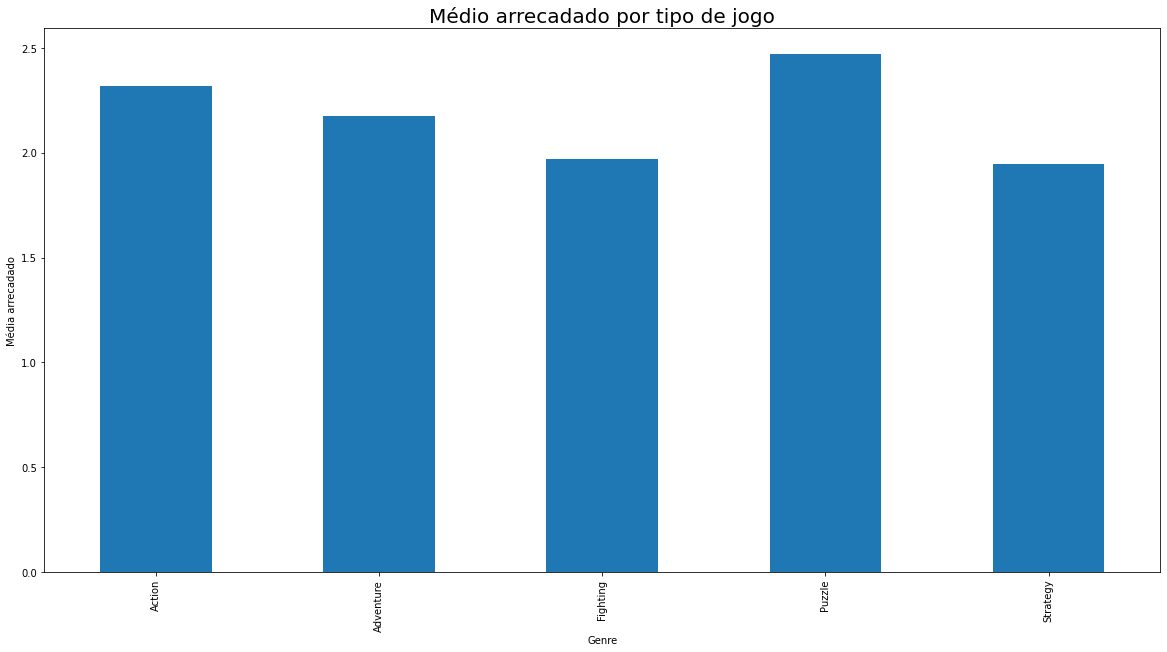

In [44]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))
fig = grupo_tipos['Global'].mean().plot.bar()
fig.set_ylabel('Média arrecadado')
fig.set_title('Médio arrecadado por tipo de jogo', {'fontsize': 20})

<AxesSubplot:>

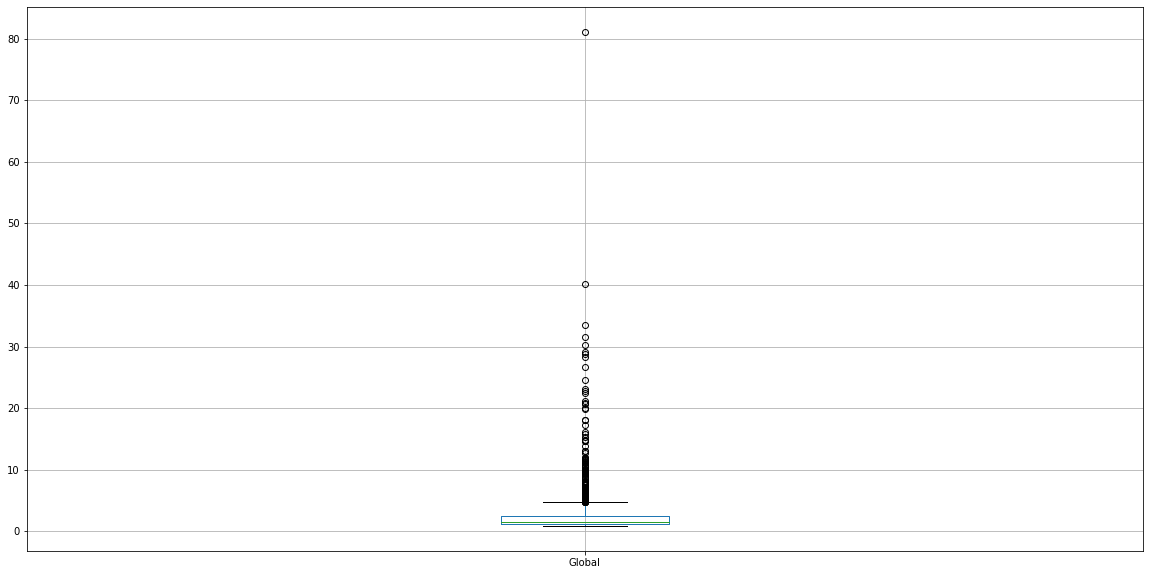

In [48]:
dados_games.boxplot(['Global'])

In [51]:
dados_games[dados_games['Global'] >= 30]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


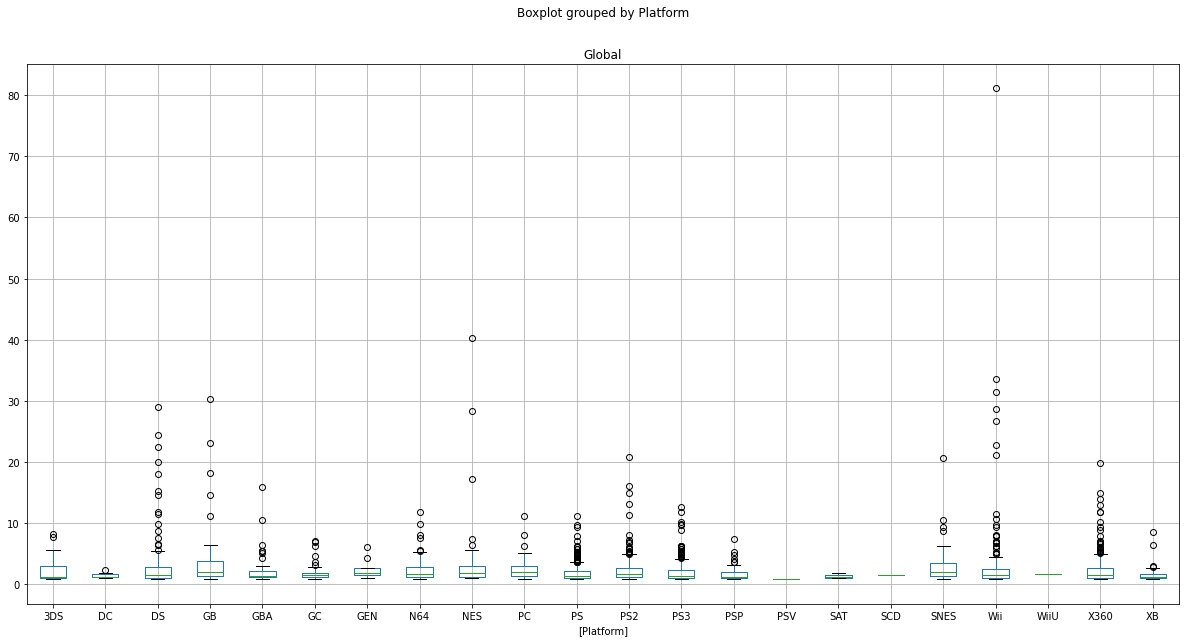

In [56]:
dados_games.boxplot(['Global'], by = ['Platform']);